In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#expmt = "200000_0.1_1_0.5_0.5_uniform_uniform_0.0_30_False_20000_5"
dataset_name = 'ml-20m-tiny'
expmt = "5_False_0.1_0.4_uniform_21000_5250_0_30_1_213973_0.5_0.5_0_0.85"
results_path = '../results/forecasting/' + dataset_name + '/Random/' + expmt 
macro_mses_pth = results_path + '/macro_mses.npy'
sample_sizes_pth = results_path + '/sample_sizes'
all_mses_pth = results_path + '/mses'
all_test_mses_pth = results_path + '/test_mses'

In [2]:
all_ss = np.loadtxt(sample_sizes_pth)
all_mses = np.loadtxt(all_mses_pth)
all_test_mses = np.loadtxt(all_test_mses_pth)
all_macro_mses = np.load(macro_mses_pth)

In [4]:
all_macro_mses.shape

(5, 46, 1000)

In [44]:
first_run = all_macro_mses[0]

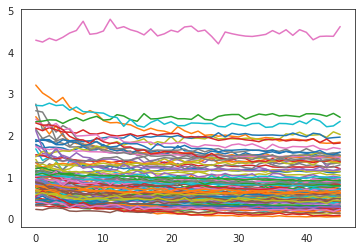

In [45]:
n_to_plot = 100
for i in range(n_to_plot):
    plt.plot(first_run[:,i])


In [47]:
improved = np.where(first_run[45] < first_run[0])[0]
worsened = np.where(first_run[45] > first_run[0])[0]

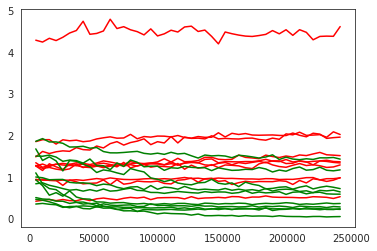

In [53]:

for i in worsened[:10]:
    plt.plot(all_ss[0], first_run[:,i], c = 'r')
for j in improved[:10]:
    plt.plot(all_ss[0], first_run[:,j], c='g')
#sns.set_style('white')
#plt.plot(all_ss[0], np.mean(first_run, axis=1))

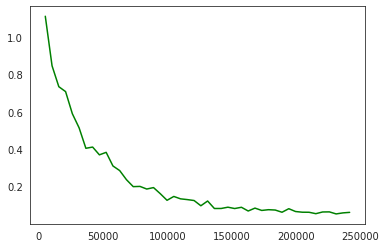

In [64]:
plt.plot(all_ss[0], first_run[:,1], c='g')

(array([  1.,   5.,   1.,   7.,  12.,  32.,  31., 126., 273., 365.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

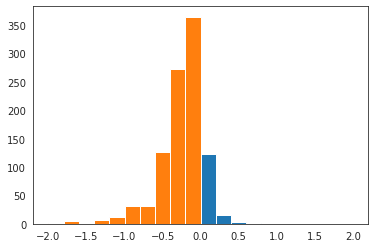

In [51]:
last_obs = first_run.shape[0]-1
plt.hist(first_run[last_obs,worsened] - first_run[0, worsened], range=(-2, 2), bins=20)
plt.hist(first_run[last_obs,improved] - first_run[0, improved], range=(-2, 2), bins=20)

In [50]:
len(improved), len(worsened)

(856, 144)

In [ ]:
# Fitting a performance curve per user 
# Stopping data collection for a given user; this is a slightly different from the 
# current set-up because I'd 

# We'll need a new experiment file